# 2. Efficient Figure Creation Tips: Abstracting Common Steps

In [1]:
from aquarel import load_theme
from matplotlib import pyplot as plt

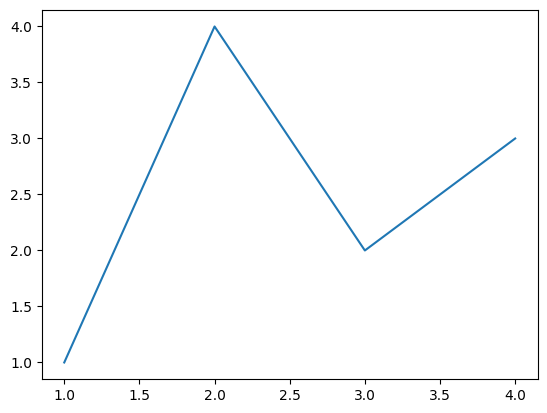

In [2]:
def draw() -> plt.figure:
    fig, ax = plt.subplots()
    ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
    return fig


fig = draw()

In [3]:
with load_theme("arctic_light"):
    fig = draw()
    print(f"{id(fig)}=")
    fig.savefig("results/tmp_arctic_light.png")

fig2 = draw()
print(f"{id(fig2)}=")
fig2.savefig("results/tmp_normal.png")

4421710576=
4362403920=


In [2]:
from dataclasses import dataclass


@dataclass
class Point2d:
    x: float
    y: float

TODO finish this workshop: https://realpython.com/mandelbrot-set-python/

> Knowing about object-oriented programming principles and recursion will enable you to take full advantage of Python’s expressive syntax to write clean code that reads almost like math formulas. 

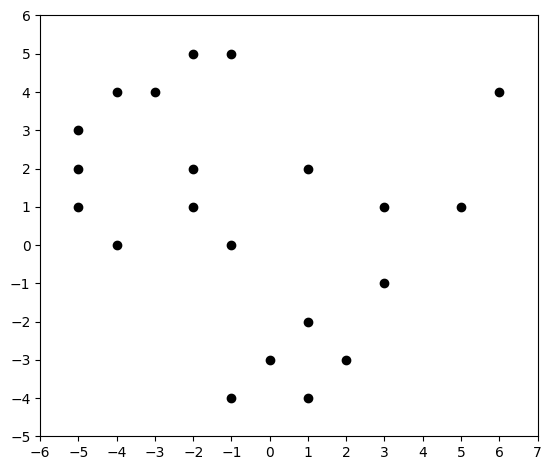

In [4]:
from math import ceil


# https://github.com/orlandpm/Math-for-Programmers/blob/master/Chapter%2002/Chapter%2002%20Walkthrough.ipynb
# https://realpython.com/python-kwargs-and-args/
def draw(objects: list[Point2d], kwargs={}) -> plt.figure:
    xs = [o.x for o in objects]
    ys = [o.y for o in objects]

    max_x, max_y, min_x, min_y = max(0, *xs), max(0, *ys), min(0, *xs), min(0, *ys)
    padding_percentage = 0.05
    padding_x = ceil((max_x - min_x) * padding_percentage)
    padding_y = ceil((max_y - min_y) * padding_percentage)

    fig, ax = plt.subplots()
    ax.set_xlim(min_x - padding_x, max_x + padding_x)
    ax.set_ylim(min_y - padding_y, max_y + padding_y)
    ax.set_xticks(range(min_x - padding_x, max_x + padding_x + 1))
    ax.set_yticks(range(min_y - padding_y, max_y + padding_y + 1))
    # ax.grid(True)

    ax.scatter(xs, ys, **kwargs)
    ax.set_aspect("equal")
    fig.tight_layout()
    return fig


dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

grid_points = [Point2d(x, y) for x, y in dino_vectors]
draw(grid_points, {"color": "black"})
plt.show()

id(fig)=5045995760
id(ax)=5043522592
id(fig_out)=5045995760
id(ax_out)=5043522592


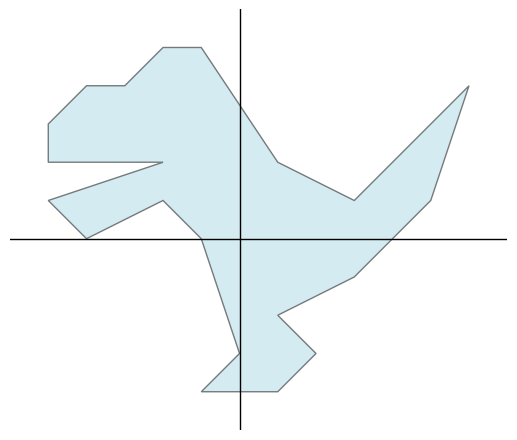

In [25]:
import matplotlib.pyplot as plt
from math import ceil


def calculate_padding(values, percentage):
    """
    Calculate padding based on a list of values and a percentage.

    Parameters:
    values (list): A list of numeric values.
    percentage (float): The percentage of the range of values to use for padding.

    Returns:
    int: The calculated padding value.
    """
    max_val = max(values)
    min_val = min(values)
    padding = ceil((max_val - min_val) * percentage)
    return padding


def set_axis_limits_and_ticks(ax, values_x, values_y, padding_percentage):
    """
    Set axis limits and ticks based on provided values and padding percentage.

    Parameters:
    ax (matplotlib.axes.Axes): The axis object to set limits and ticks on.
    values_x (list): A list of numeric values for the x-axis.
    values_y (list): A list of numeric values for the y-axis.
    padding_percentage (float): The percentage of the range of values to use for padding.
    """
    min_x = min(values_x)
    max_x = max(values_x)
    min_y = min(values_y)
    max_y = max(values_y)

    padding_x = calculate_padding(values_x, padding_percentage)
    padding_y = calculate_padding(values_y, padding_percentage)

    ax.set_xlim(min_x - padding_x, max_x + padding_x)
    ax.set_ylim(min_y - padding_y, max_y + padding_y)
    ax.set_xticks(range(min_x - padding_x, max_x + padding_x + 1))
    ax.set_yticks(range(min_y - padding_y, max_y + padding_y + 1))

    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)

    return ax


def draw(objects, kwargs={}):
    """
    Draw points represented by 2D coordinates.

    Parameters:
    objects (list): A list of objects containing x and y attributes representing coordinates.
    kwargs: Additional keyword arguments to be passed to the scatter plot function.

    Returns:
    matplotlib.figure.Figure: The created figure.
    """
    xs = [o.x for o in objects]
    ys = [o.y for o in objects]

    padding_percentage = 0.05

    fig, ax = plt.subplots()

    set_axis_limits_and_ticks(ax, xs, ys, padding_percentage)

    ax.grid(True)
    ax.fill(xs, ys, **kwargs)
    ax.set_aspect("equal")
    print(f"{id(fig)=}")
    print(f"{id(ax)=}")
    fig.tight_layout()
    return fig, ax


dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

grid_points = [Point2d(x, y) for x, y in dino_vectors]
dino_settings = {"color": "lightblue", "edgecolor": "black", "alpha": 0.5}
fig_out, ax_out = draw(grid_points, dino_settings)

print(f"{id(fig_out)=}")
print(f"{id(ax_out)=}")

ax_out.grid(False)
ax_out.set_axis_off()

plt.show()